In [ ]:
!pip install stocknews

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.3 MB/s eta 0:00:00
  Created wheel for stocknews: filename=stocknews-0.9.11-py3-none-any.whl size=5396 sha256=73603e37851bc590ee984c6c41c875c5d46926a6fc259021a388f7976f62f342
  Stored in directory: /root/.cache/pip/wheels/9e/59/42/c5ab3171c3509ff8bc6aafbc089fe826eacf531ef7f7803ff6
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=3a645f3b3a123b67ecc6409f2a763c5f7e84d8682ae60915f3c2d97d17f3cdd2
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built stocknews sgmllib3k


In [ ]:
!pip show stocknews

Name: stocknews
Version: 0.9.11
Summary: PoC for scraping Yahoo News with sentiment analysis
Home-page: http://github.com/primus852/stock-news.git
Author: Torsten Wolter
Author-email: tow.berlin@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: feedparser, nltk, numpy, pandas, requests
Required-by: 


In [ ]:
from stocknews import StockNews
import pandas as pd

sn = StockNews(['NVDA'])

# Mendapatkan dan merangkum berita
df = sn.read_rss()
print(df)

                                    guid stock  \
0   8556dadb-69e1-3dee-ae90-9c10218a696c  NVDA   
1   408f2e92-3b48-3b19-8555-e2ff01e354e8  NVDA   
2   30b638c6-8ef5-374a-b13e-95fd86558e66  NVDA   
3   30b65cb1-61d9-3fd2-ad81-96d075882263  NVDA   
4   2a825dc4-2b36-3967-9830-3ac34e8c74b6  NVDA   
5   a1392ae6-b6d9-39c3-9ff7-8d378e0e5b4c  NVDA   
6   60c45e42-f749-3335-84c5-588d3b53de01  NVDA   
7   133ba685-ee05-3d4d-ac13-23e0756b6ae1  NVDA   
8   17311603-ba99-3abd-ac85-197db6903b25  NVDA   
9   5b7b3020-3777-3857-87da-c1db9126d471  NVDA   
10  cf394c2d-9d08-377d-8bd7-a9b621099ed1  NVDA   
11  457c0c7a-07c0-3262-a1b9-cd667804a801  NVDA   
12  72d0c57b-ce5b-3ea0-b12d-b9e70b2a54c6  NVDA   
13  a048f3a4-4960-3159-8234-aa5b2d67416b  NVDA   
14  0a14bcfe-70a6-3547-a304-5c8a1aad7928  NVDA   
15  e8522465-1a5c-3530-afac-2d1f16be8115  NVDA   
16  9a5deb8c-1352-3436-9e51-519815d3d919  NVDA   
17  4f31896c-76c9-31a5-90d0-d6c134b4a275  NVDA   
18  b178cc62-25d5-3fe9-9bd5-f2837a1798c6  NVDA   


In [ ]:
titles = df['title']
titles

,title
0,Dow Jones Futures: After Nvidia Sours Market R...
1,Nvidia earnings: How one VC views the stock's ...
2,Why Taiwan Semiconductor Stock Had a Thursday ...
3,Generative AI coding startup Magic lands $320M...
4,IBM Cloud to offer Intel's Gaudi 3 AI chips ne...
5,These tech giants are contributing the most to...
6,Leveraged Nvidia ETF issuers saw trading surge...
7,NetApp Beat Earnings Estimates. So Why Did the...
8,NVIDIA Announces Upcoming Event for Financial ...
9,Dow Hits Closing Record as Markets Analyze Mac...


In [ ]:
titles.to_csv('titles.csv')

In [ ]:
summary = df['summary']
print(summary)

0     The Dow hit a high, but the Nasdaq ended lower...
1     Shares of Nvidia (NVDA) slid this week, despit...
2     In the past, the company's shares have soared ...
3     Magic, an AI startup creating models to genera...
4     Intel has found its first cloud customer for i...
5     Several Big Tech players are the biggest contr...
6     Interest in leveraged exchange-traded funds th...
7     NetApp's fiscal first-quarter sales and profit...
8     SANTA CLARA, Calif., Aug. 29, 2024 (GLOBE NEWS...
9     Dow Hits Closing Record as Markets Analyze Mac...
10    A host of Wall Street firms raised their price...
11    (Bloomberg) -- Nvidia Corp., the world’s bigge...
12    A look a 3 stocks and the Tech Innovators serv...
13    The stock market escaped disappointing Nvidia ...
14    Shares of Nvidia (NVDA) continue to slide Thur...
15    Nvidia (NVDA) posted its second quarter earnin...
16    The tech giants would join a multibillion-doll...
17    Nvidia stock falls following an earnings b

In [ ]:
summary_sentiment = df['sentiment_summary']
summary_title = df['sentiment_title']

In [ ]:
df['p_date'] = df['p_date'].str.replace('NVDA_', '', regex=True)

In [ ]:
date = df['p_date']
date

,p_date
0,2024-08-30
1,2024-08-29
2,2024-08-29
3,2024-08-29
4,2024-08-29
5,2024-08-29
6,2024-08-29
7,2024-08-29
8,2024-08-29
9,2024-08-29


<function matplotlib.pyplot.show(close=None, block=None)>

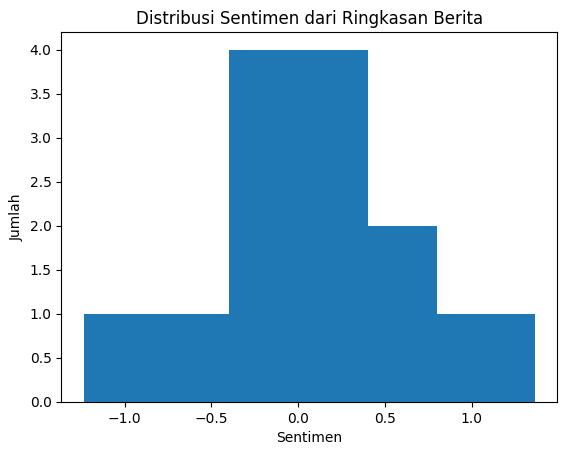

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = summary_sentiment.value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen dari Ringkasan Berita')
plt.show


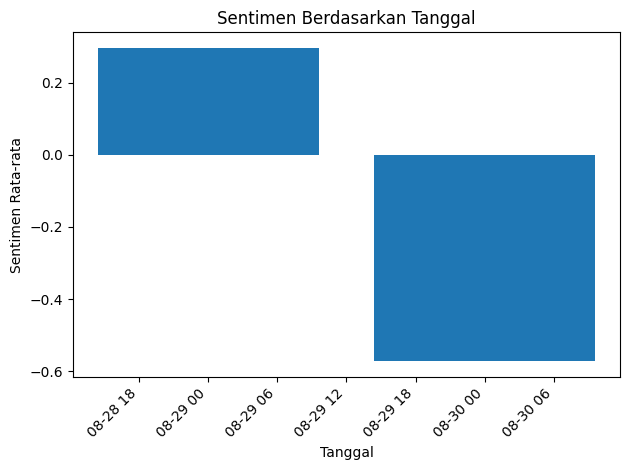

In [ ]:
df_grouped = df.groupby('p_date')['sentiment_summary'].median().reset_index()

# Create bar chart
plt.bar(df_grouped['p_date'], df_grouped['sentiment_summary'])
plt.xlabel('Tanggal')
plt.ylabel('Sentimen Rata-rata')
plt.title('Sentimen Berdasarkan Tanggal')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

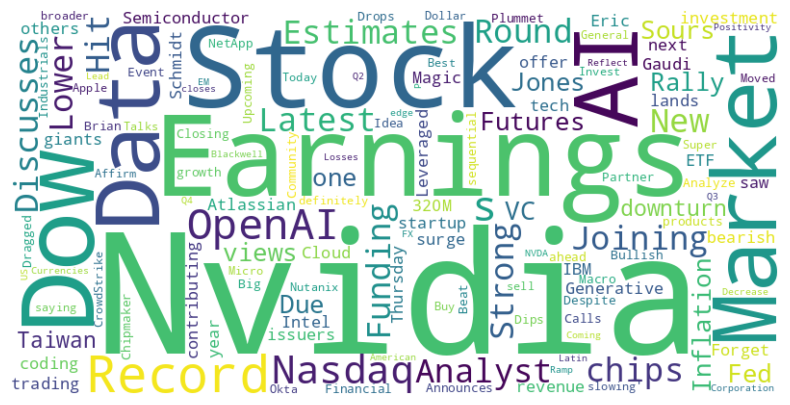

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Gabungkan semua ringkasan berita menjadi satu string
all_summaries = ' '.join(titles)

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_summaries)

# Tampilkan gambar WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
